Found 31967 files belonging to 3 classes.
Classes: ['class1', 'class2', 'class3']
Found 7967 files belonging to 3 classes.
Found 5372 files belonging to 3 classes.
Epoch 1/25
999/999 [==============================] - 71s 35ms/step - loss: 0.3018 - accuracy: 0.8697 - val_loss: 0.1511 - val_accuracy: 0.9372
Epoch 2/25
999/999 [==============================] - 27s 27ms/step - loss: 0.1087 - accuracy: 0.9619 - val_loss: 0.0667 - val_accuracy: 0.9751
Epoch 3/25
999/999 [==============================] - 22s 22ms/step - loss: 0.0692 - accuracy: 0.9759 - val_loss: 0.0712 - val_accuracy: 0.9748
Epoch 4/25
999/999 [==============================] - 22s 22ms/step - loss: 0.0455 - accuracy: 0.9841 - val_loss: 0.0808 - val_accuracy: 0.9689
Epoch 5/25
999/999 [==============================] - 22s 22ms/step - loss: 0.0386 - accuracy: 0.9868 - val_loss: 0.0691 - val_accuracy: 0.9774
Epoch 6/25
999/999 [==============================] - 22s 22ms/step - loss: 0.0322 - accuracy: 0.9893 - val_loss: 0.

ValueError: x and y must have same first dimension, but have shapes (10,) and (25,)

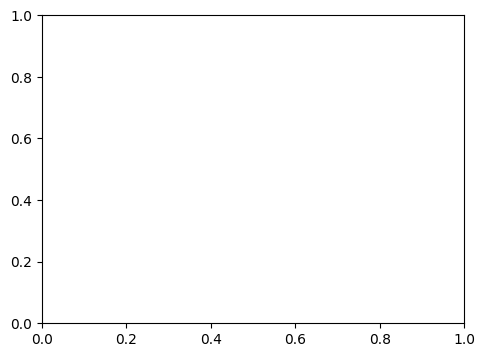

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load training dataset (raw) and extract class names
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    "train",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

# Get class names and number of classes
class_names = train_ds_raw.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    "valid",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)

# Cache and prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


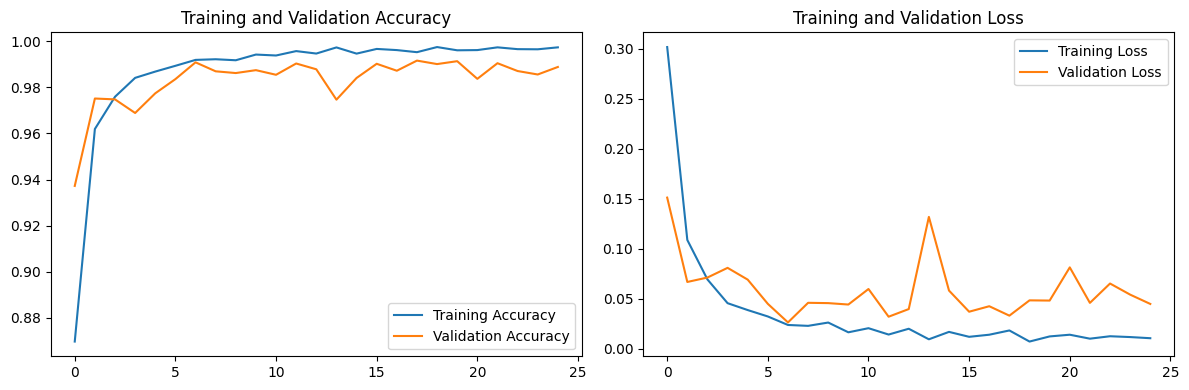

In [9]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
model.save("trained_model3.keras")

NameError: name 'model' is not defined

Found 5372 files belonging to 3 classes.
168/168 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

      class1       1.00      1.00      1.00      5325
      class2       1.00      1.00      1.00        14
      class3       0.95      0.64      0.76        33

    accuracy                           1.00      5372
   macro avg       0.98      0.88      0.92      5372
weighted avg       1.00      1.00      1.00      5372



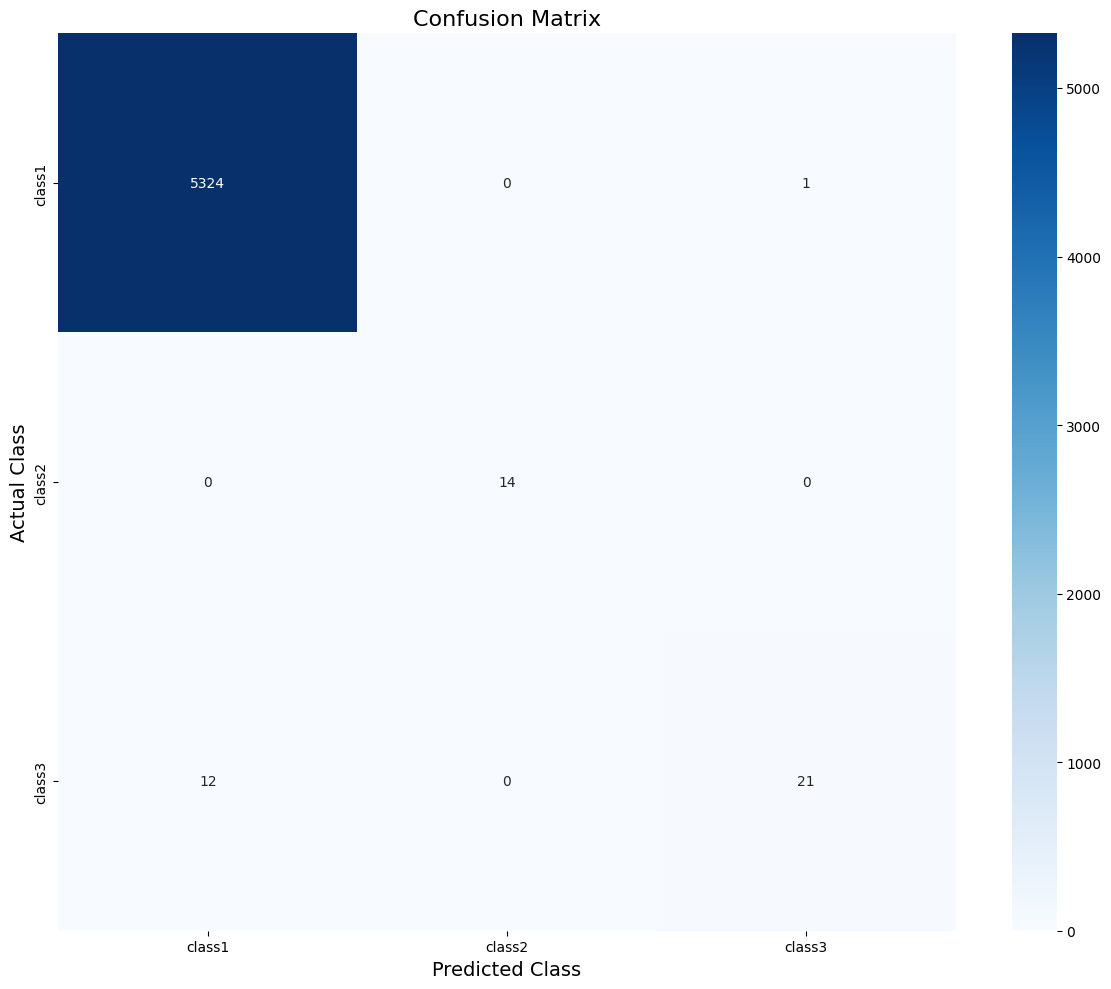

In [16]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load test set
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',                      
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

# Step 2: Get class names
class_name = test_set.class_names        

# Step 3: Predict on test set
y_pred = model.predict(test_ds)
prediction_categories = tf.argmax(y_pred, axis=1)

# Step 4: Get true labels
Y_true = tf.concat([labels for _, labels in test_set], axis=0)

# Step 5: Classification Report
print(classification_report(Y_true, prediction_categories, target_names=class_name))

# Step 6: Confusion Matrix
cm = confusion_matrix(Y_true, prediction_categories)

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_name, yticklabels=class_name,
            annot_kws={'size': 10})
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.show()
